In [4]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot
from matplotlib.lines import Line2D 
from pandas import DataFrame, Series
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import requests
import re
import json

In [6]:
def same_sign(a, b):
    return (a > 0 and b > 0) or (a < 0 and b < 0)

def diff_sign(a, b):
    return (a > 0 and b < 0) or (a < 0 and b > 0) or a == 0 or b == 0

def sign(a):
    if a > 0:
        return 1
    elif a < 0:
        return -1
    else:
        return 0

same_sign = np.vectorize(same_sign)
diff_sign = np.vectorize(diff_sign)
sign = np.vectorize(sign)

def genX(n):
    x = (np.random.rand(n,2) - 0.5) * 2
    x = np.append(np.ones((n,1)), x, 1)
    return x

MAX_ITERS_EACH_RUN = 1000000

In [7]:
prob_disagrees = []
iters = []
N = 100
M = N * 10
for r in range(1000): # 1000 runs
    X = genX(N)
    #print('X =', X[:5], '...')

    XOUT = genX(M)
    #print('XOUT =', XOUT[:5], '...')

    tps = (np.random.rand(2,2) - 0.5) * 2
    w2 = 1
    w1 = (tps[1,1] - tps[0,1])/(tps[0,0] - tps[1,0])
    w0 = -(w1*tps[0,0] + tps[0,1])
    W = np.array([w0,w1,w2])
    #print('W =', W)

    XF = sign((X * W).sum(axis=1))
    #print('XF =', XF[:5], '...')
    XOUTF = sign((XOUT * W).sum(axis=1))
    #print('XOUTF =', XOUTF[:5], '...')


    #wg = ((np.random.rand(3) - 0.5) * 2).reshape(1,3)
    wg = np.array([0,0,0]).reshape(1,3)
    #print('init wg =', wg)
    for n in range(1,MAX_ITERS_EACH_RUN+1):
        xg = (X * wg.repeat(N, axis=0)).sum(axis=1)
        matches = same_sign(xg, XF)
        if matches.min():  # if min value is true
            #print('wg =', wg)
            #print('done with n =', n)
            iters.append(n)
            break
        else:
            i = matches.argmin() # index of the min (false) value
            wg = X[i] * XF[i] + wg
        if n == MAX_ITERS_EACH_RUN:
            raise Exception("Reach max iterations for a run!")

    xoutg = sign((XOUT * wg).sum(axis=1))
    #print('xoutg=', xoutg[:5], '...')
    prob_disagree = 1. * XOUTF[diff_sign(xoutg, XOUTF)].size / XOUTF.size
    #print('prob_disagree =', prob_disagree)
    prob_disagrees.append(prob_disagree)
    
print('iters =', iters[:5], '...')
print('prob_disagrees =', prob_disagrees[:5], '...')
print('Avg iters =', np.average(iters))
print('Avg prob_disagrees =', np.average(prob_disagrees))

iters = [72, 86, 45, 28, 404] ...
prob_disagrees = [0.017, 0.002, 0.009, 0.019, 0.004] ...
Avg iters = 200.513
Avg prob_disagrees = 0.013641


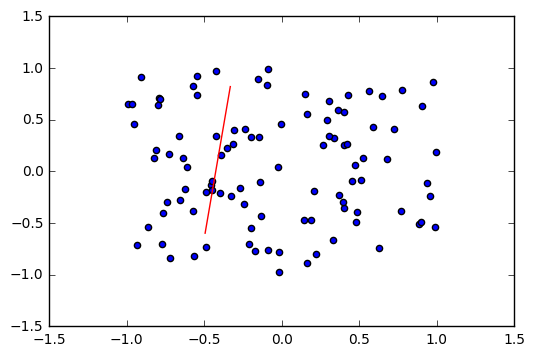

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,1], X[:,2])
ax.plot(tps[:,0], tps[:,1], 'r-')
None